## Questionário 3
### Lucas Corlete Alves de Melo  13676461

### Enunciado

1 – Considere as bases Iris e Vehicle. Em um mesmo gráfico, mostre a acurácia em função de k
para o método k-vizinhos.

2 – Considere os dados gerados com o código abaixo e obtenha as regiões de separação usando
o método k-vizinhos para diferentes valores de k. Compare com as regiões obtidas usando o
método regressão logística.

    from sklearn import datasets
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6,4))
    n_samples = 1000
    data = datasets.make_moons(n_samples=n_samples, noise=.9)
    X = data[0]
    y = data[1]
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
    plt.show(True)

3 – Classifique as bases Iris e Vehicle usando regressão logística e compare com o método k-
vizinhos.

### Exercise 1

First of all, lets read our data

In [1]:
# Data loading

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

iris = pd.read_csv('data/iris.csv', header=(0))
# vehicle = pd.read_csv('data/Vehicle.csv', header=(0))

iris = iris.dropna(axis='rows') #remove NaN
# stores classes names
iris_classes = np.array(pd.unique(iris[iris.columns[-1]]), dtype=str)  

iris_nrow, iris_ncol = iris.shape
print("Attributes matrix: Number of rows:", iris_nrow, " columns: ", iris_ncol)
iris_attributes = list(iris.columns)
iris.head(10)

Attributes matrix: Number of rows: 150  columns:  5


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [2]:
vehicle = pd.read_csv('data/Vehicle.csv', header=(0))
vehicle = vehicle.dropna(axis='rows') #remove NaN
# stores classes names
vehicle_classes = np.array(pd.unique(vehicle[vehicle.columns[-1]]), dtype=str)  

vehicle_nrow, vehicle_ncol = vehicle.shape
print("Attributes matrix: Number of rows:", vehicle_nrow, " columns: ", vehicle_ncol)
vehicle_attributes = list(vehicle.columns)
vehicle.head(10)

Attributes matrix: Number of rows: 846  columns:  19


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


Converting data to numpy. Just to make manipulation easier

In [3]:
iris = iris.to_numpy()
iris_nrow,iris_ncol = iris.shape
yi = iris[:,-1]
Xi = iris[:,0:iris_ncol-1]

In [4]:
vehicle = vehicle.to_numpy()
vehicle_nrow,vehicle_ncol = vehicle.shape
yv = vehicle[:,-1]
Xv = vehicle[:,0:vehicle_ncol-1]

In [5]:
from sklearn.preprocessing import StandardScaler
scaleri = StandardScaler().fit(Xi)
Xi = scaleri.transform(Xi)

scalerv = StandardScaler().fit(Xv)
Xv = scalerv.transform(Xv)

In [6]:
print('Transformed Iris data:')
print('Mean: ', np.mean(Xi, axis = 0))
print('Standard error:', np.std(Xi, axis = 0))
print('\n')
print(100*'=')
print('Transformed Vehicle data:')
print('Mean: ', np.mean(Xv, axis = 0))
print('Standard error:', np.std(Xv, axis = 0))

Transformed Iris data:
Mean:  [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Standard error: [1. 1. 1. 1.]


Transformed Vehicle data:
Mean:  [ 5.87919521e-16 -3.14956886e-16 -3.65349988e-16 -1.67977006e-16
  3.77948264e-17 -1.63777581e-16 -3.56951138e-16  1.72176431e-16
  1.67977006e-17  8.27286755e-16 -9.02876408e-17 -1.46979880e-16
  3.73748839e-16 -6.92905150e-16 -5.24928144e-17 -2.93959761e-17
 -1.31022065e-15  1.52649104e-15]
Standard error: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Training and Test sets

In [7]:
from sklearn.model_selection import train_test_split
p = 0.7

xi_train, xi_test, yi_train, yi_test = train_test_split(Xi, yi, train_size = p, random_state = 42)
xv_train, xv_test, yv_train, yv_test = train_test_split(Xv, yv, train_size = p, random_state = 42)

Classification by knn method

In [8]:
from sklearn.neighbors import KNeighborsClassifier
k = 2 # number of neighbors
# Adjust the knn model (Iris)
modeli = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
modeli.fit(xi_train,yi_train)
# Prediction in test set
yi_pred = modeli.predict(xi_test)

# Adjust the knn model (Vehicle)
modelv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
modelv.fit(xv_train,yv_train)
# # Prediction in test set
yv_pred = modelv.predict(xv_test)

Classification error by accuracy measure

In [9]:
from sklearn.metrics import accuracy_score
scorei = accuracy_score(yi_pred, yi_test)
print('Iris Accuracy:', scorei)
scorev = accuracy_score(yv_pred, yv_test)
print('Vehicle Accuracy:', scorev)

Iris Accuracy: 0.9777777777777777
Vehicle Accuracy: 0.7165354330708661


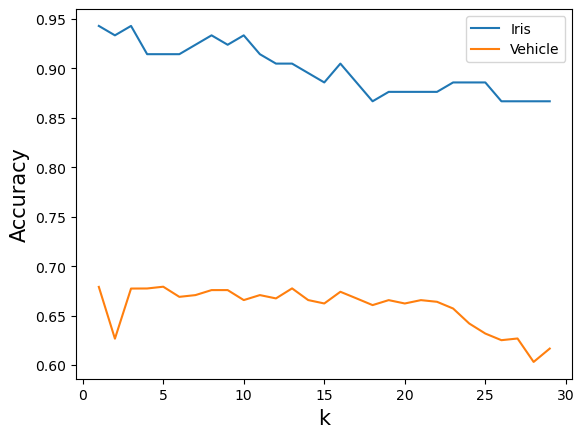

(Iris) Best k: 1
(Vehicle) Best k: 5


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def fbest_k(x_train, y_train, label):
  """
  This function performs k-fold cross-validation for KNN algorithm and stores results.

  Args:
      x_train: Training data features.
      y_train: Training data labels.
      label: Label for the dataset (e.g., "Iris", "Vehicle").

  Returns:
      vk: List of k values used for validation.
      vscore: List of average accuracy scores for each k.
  """
  nkf = 5  # Number of folds
  vk = []  # Stores k values
  vscore = []
  for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    # Perform cross-validation
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    # Store average accuracy
    vscore.append(cv['test_score'].mean())
    vk.append(k)

  # Plot the curve for this dataset
  plt.plot(vk, vscore, label=label)
  return vk, vscore



# Perform cross-validation and get results for both datasets
iris_vk, iris_vscore = fbest_k(xi_train, yi_train, label="Iris")
vehicle_vk, vehicle_vscore = fbest_k(xv_train, yv_train, label="Vehicle")

# Configure and display the plot
plt.xlabel('k', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()
plt.show(True)

# Find best k for each dataset
best_ki = np.argmax(iris_vscore) + 1
best_kv = np.argmax(vehicle_vscore) + 1
print('(Iris) Best k:', best_ki)
print('(Vehicle) Best k:', best_kv)

In [11]:
modeli = KNeighborsClassifier(n_neighbors=best_ki, metric = 'euclidean')
modeli.fit(xi_train, yi_train)
yi_pred = modeli.predict(xi_test)

modelv = KNeighborsClassifier(n_neighbors=best_kv, metric = 'euclidean')
modelv.fit(xv_train, yv_train)
yv_pred = modelv.predict(xv_test)

print('(Iris)Accuracy:', accuracy_score(yi_pred, yi_test))
print('(Vehicle)Accuracy:', accuracy_score(yv_pred, yv_test))

(Iris)Accuracy: 0.9777777777777777
(Vehicle)Accuracy: 0.7677165354330708


### Exercise 2

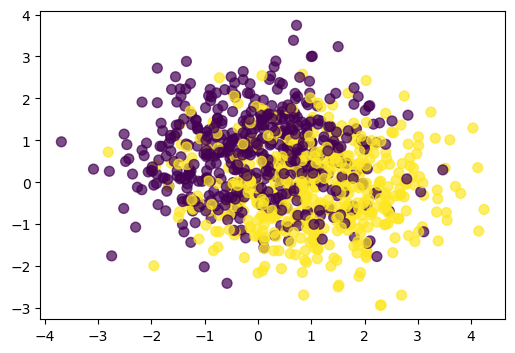

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

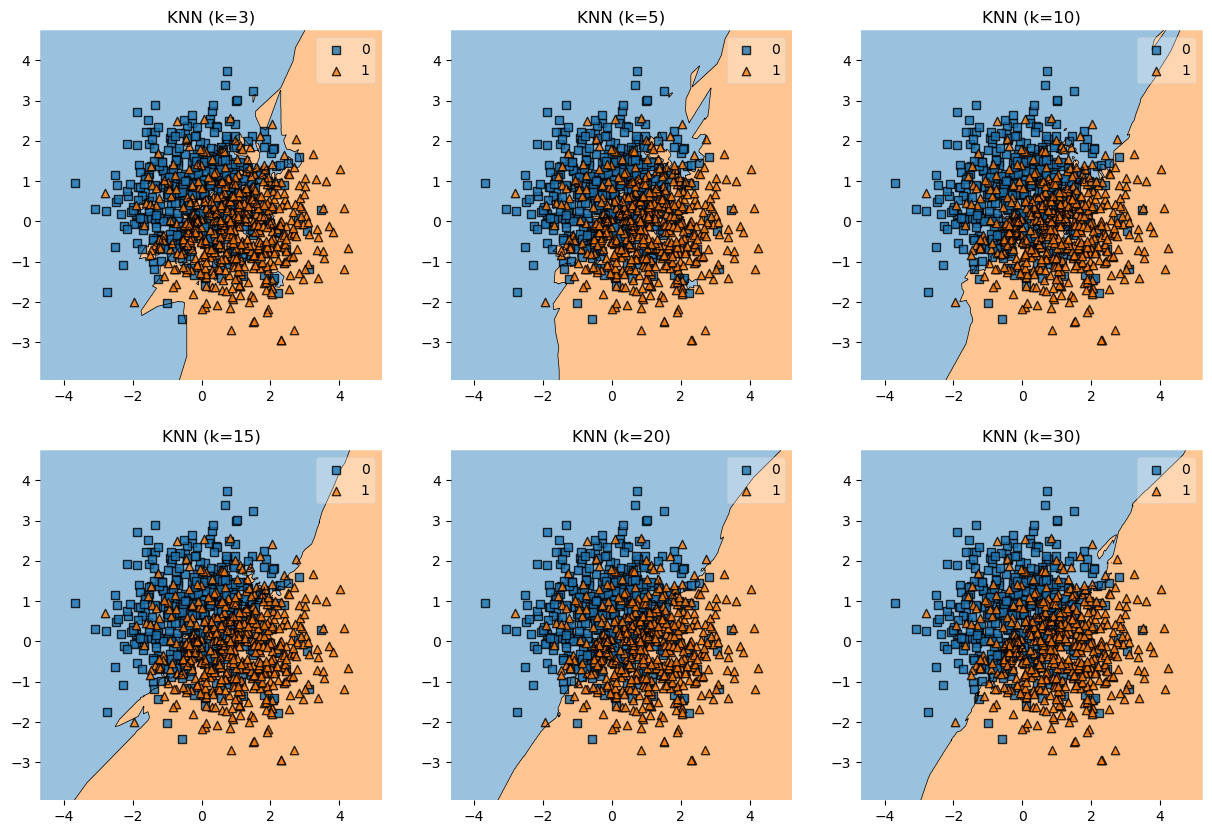

In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions


# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Making models and training
models = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=10)': KNeighborsClassifier(n_neighbors=10),
    'KNN (k=15)': KNeighborsClassifier(n_neighbors=15),
    'KNN (k=20)': KNeighborsClassifier(n_neighbors=20),
    'KNN (k=30)': KNeighborsClassifier(n_neighbors=30)
#     'Regressão Logística': LogisticRegression(),
#     'SVM (linear)': SVC(kernel='linear'),
#     'SVM (RBF)': SVC(kernel='rbf')
}

# PLoting decision regions
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    plt.subplot(2, 3, i+1)
    plot_decision_regions(X, y, clf=model)
    plt.title(name)
plt.show()

### Exercise 3

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

p = 0.8 # train set fraction
xi_train, xi_test, yi_train, yi_test = train_test_split(Xi, yi, train_size = p)
xv_train, xv_test, yv_train, yv_test = train_test_split(Xv, yv, train_size = p)

logistic_modeli = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
logistic_modeli.fit(xi_train, yi_train)

logistic_modelv = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
logistic_modelv.fit(xv_train, yv_train)

yi_pred = logistic_modeli.predict(xi_test)
yv_pred = logistic_modelv.predict(xv_test)
print('(Iris)Accuracy: ', logistic_modeli.score(xi_test, yi_test))
print('(Vehicle)Accuracy: ', logistic_modelv.score(xv_test, yv_test))

(Iris)Accuracy:  1.0
(Vehicle)Accuracy:  0.7588235294117647


In [15]:
# Train-test split already implemented in the cell below

# Logistic Regression models already trained (logistic_modeli and logistic_modelv)

# Training knn models
k=3 # Adjust k as needed, but I put one between the bests we found out before
knn_iris = KNeighborsClassifier(n_neighbors=k)  
knn_iris.fit(xi_train, yi_train)

knn_vehicle = KNeighborsClassifier(n_neighbors=k)
knn_vehicle.fit(xv_train, yv_train)

# Predicting with k-NN models
yi_pred_knn = knn_iris.predict(xi_test)
yv_pred_knn = knn_vehicle.predict(xv_test)

# Evaluating k-NN accuracy
accuracy_knn_iris = accuracy_score(yi_test, yi_pred_knn)
accuracy_knn_vehicle = accuracy_score(yv_test, yv_pred_knn)

# Print results
print('(Iris) Logistic Regression Accuracy:', logistic_modeli.score(xi_test, yi_test))
print('(Iris) knn Accuracy:', accuracy_knn_iris)
print(70*'=')
print('(Vehicle) Logistic Regression Accuracy:', logistic_modelv.score(xv_test, yv_test))
print('(Vehicle) knn Accuracy:', accuracy_knn_vehicle)

print()

(Iris) Logistic Regression Accuracy: 1.0
(Iris) knn Accuracy: 0.9666666666666667
(Vehicle) Logistic Regression Accuracy: 0.7588235294117647
(Vehicle) knn Accuracy: 0.6529411764705882



Based on the presented results, we can observe that:

- **Iris**: Both algorithms, logistic regression and k-NN with k=3, achieved a near-perfect accuracy (or even 100%). This indicates that for this dataset, both models fit the data very well and can correctly classify the flowers with high precision. The choice between one and the other may depend on other factors such as interpretability or computational complexity.
- **Vehicle**: Logistic regression achieved a higher accuracy than KNN. However, the difference is small, suggesting that both models are capable of classifying vehicles with reasonable accuracy.

====================================================================================================================

**(Portuguese)**

*Com base nos resultados apresentados, podemos observar que:*
- ***Iris**: Ambos os algoritmos, regressão logística e KNN com k=3, alcançaram uma acurácia próximo (ou igual) a 100%. Isso indica que para este dataset, ambos os modelos se ajustam muito bem aos dados e conseguem classificar as flores corretamente com alta precisão. A escolha entre um e outro pode depender de outros fatores como interpretabilidade ou complexidade computacional.*
- ***Vehicle**: A regressão logística obteve uma acurácia superior ao KNN. No entanto, a diferença é pequena, sugerindo que ambos os modelos são capazes de classificar os veículos com razoável precisão.*